# **Business Case : Logistic Regression**

An online platform is delivering customized loan products to
millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible
loans on consumer friendly terms to salaried professionals and businessmen.
The data science team is building an underwriting layer to determine the
creditworthiness of MSMEs as well as individuals.

It deploys formal credit to salaried individuals and businesses 4 main financial
instruments:

1. Personal Loan

2. EMI Free Loan

3. Personal Overdraft

4. Advance Salary Loan


This case study will focus on the underwriting process behind **Personal Loan** only

**Problem Statement**

Given a set of attributes for an Individual, determine ;
- If a credit line should be extended to them.
- If so, what should the repayment terms be in business recommendations?

---

**Column Profiling**

1. loan_amnt : The listed amount of the loan applied for by the borrower. If at some
point in time, the credit department reduces the loan amount, then it will be
reflected in this value.
2. term : The number of payments on the loan. Values are in months and can be
either 36 or 60.
3. int_rate : Interest Rate on the loan
4. installment : The monthly payment owed by the borrower if the loan originates.
5. grade : Assigned loan grade
6. sub_grade : Assigned loan subgrade
7. emp_title :The job title supplied by the Borrower when applying for the loan.*
8. emp_length : Employment length in years. Possible values are between 0 and 10
where 0 means less than one year and 10 means ten or more years.
9. home_ownership : The home ownership status provided by the borrower during
registration or obtained from the credit report.
10. annual_inc : The self-reported annual income provided by the borrower during
registration.
11. verification_status : Indicates if income was verified , not verified, or if
the income source was verified
12. issue_d : The month which the loan was funded
13. loan_status : Current status of the loan - Target Variable
14. purpose : A category provided by the borrower for the loan request.
15. title : The loan title provided by the borrower
16. dti : A ratio calculated using the borrower’s total monthly debt payments on the
total debt obligations, excluding mortgage and the requested loan,
divided by the borrower’s self-reported monthly income.
17. earliest_cr_line :The month the borrower's earliest reported credit line was
opened
18. open_acc : The number of open credit lines in the borrower's credit file.
19. pub_rec : Number of derogatory public records
20. revol_bal : Total credit revolving balance
21. revol_util : Revolving line utilization rate, or the amount of credit the borrower is
using relative to all available revolving credit.
22. total_acc : The total number of credit lines currently in the borrower's credit file
23. initial_list_status : The initial listing status of the loan. Possible values are – W, F
24. application_type : Indicates whether the loan is an individual application or a joint
application with two co-borrowers
25. mort_acc : Number of mortgage accounts.
26. pub_rec_bankruptcies : Number of public record bankruptcies
27. Address: Address of the individual

---

**Project Flow**:

1. Exploratory Data Analysis
2. Feature Engineering
3. Logistic Regression
4. Precision Vs Recall Tradeoff



In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

pd.set_option('display.max_columns', None)

from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (accuracy_score, confusion_matrix,
                             roc_curve, auc, ConfusionMatrixDisplay,
                             f1_score, recall_score,
                             precision_score, precision_recall_curve,
                             average_precision_score, classification_report)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:/Users/TEJA/Downloads/loan.csv")

In [3]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Debt consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,debt_consolidation,Loanforpayoff,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


## **Data Pre-Processing**

In [4]:
print("No of Rows :",df.shape[0])
print("No of Columns :",df.shape[1])

No of Rows : 396030
No of Columns : 27


In [5]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

Statistical Summary of features

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,NaN,NaN,NaN,14113.888089,8357.441341,500.0,8000.0,12000.0,20000.0,40000.0
term,396030,2,36 months,302005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_rate,396030.0,NaN,NaN,NaN,13.6394,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,NaN,NaN,NaN,431.849698,250.72779,16.08,250.33,375.43,567.3,1533.81
grade,396030,7,B,116018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_grade,396030,35,B3,26655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_title,373103,173105,Teacher,4389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_length,377729,11,10+ years,126041,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_ownership,396030,6,MORTGAGE,198348,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_inc,396030.0,NaN,NaN,NaN,74203.175798,61637.621158,0.0,45000.0,64000.0,90000.0,8706582.0


Checking unique values for each feature

In [8]:
for col in df.columns:
    print(f"{col}: \n{df[col].unique()}\n")

loan_amnt: 
[10000.  8000. 15600. ... 36275. 36475.   725.]

term: 
[' 36 months' ' 60 months']

int_rate: 
[11.44 11.99 10.49  6.49 17.27 13.33  5.32 11.14 10.99 16.29 13.11 14.64
  9.17 12.29  6.62  8.39 21.98  7.9   6.97  6.99 15.61 11.36 13.35 12.12
  9.99  8.19 18.75  6.03 14.99 16.78 13.67 13.98 16.99 19.91 17.86 21.49
 12.99 18.54  7.89 17.1  18.25 11.67  6.24  8.18 12.35 14.16 17.56 18.55
 22.15 10.39 15.99 16.07 24.99  9.67 19.19 21.   12.69 10.74  6.68 19.22
 11.49 16.55 19.97 24.7  13.49 18.24 16.49 25.78 25.83 18.64  7.51 13.99
 15.22 15.31  7.69 19.53 10.16  7.62  9.75 13.68 15.88 14.65  6.92 23.83
 10.75 18.49 20.31 17.57 27.31 19.99 22.99 12.59 10.37 14.33 13.53 22.45
 24.5  17.99  9.16 12.49 11.55 17.76 28.99 23.1  20.49 22.7  10.15  6.89
 19.52  8.9  14.3   9.49 25.99 24.08 13.05 14.98 16.59 11.26 25.89 14.48
 21.99 23.99  5.99 14.47 11.53  8.67  8.59 10.64 23.28 25.44  9.71 16.2
 19.24 24.11 15.8  15.96 14.49 18.99  5.79 19.29 14.54 14.09  9.25 19.05
 17.77 18.92 20.7

In [9]:
# numerical columns
num_cols = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc','pub_rec_bankruptcies']

# categorical columns
cat_cols = ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address']

Unique values in all categorical columns


In [10]:
for col in cat_cols:
  print(f"No. of unique values in {col}: {df[col].nunique()}")

No. of unique values in term: 2
No. of unique values in grade: 7
No. of unique values in sub_grade: 35
No. of unique values in emp_title: 173105
No. of unique values in emp_length: 11
No. of unique values in home_ownership: 6
No. of unique values in verification_status: 3
No. of unique values in issue_d: 115
No. of unique values in loan_status: 2
No. of unique values in purpose: 14
No. of unique values in title: 48816
No. of unique values in earliest_cr_line: 684
No. of unique values in initial_list_status: 2
No. of unique values in application_type: 3
No. of unique values in address: 393700


 Convert "earliest credit line" & "issue date" to datetime

In [11]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
df['issue_d'] = pd.to_datetime(df['issue_d'])

Convert "emp_length" to numeric


In [12]:
d = {'10+ years':10, '4 years':4, '< 1 year':0,
     '6 years':6, '9 years':9,'2 years':2, '3 years':3,
     '8 years':8, '7 years':7, '5 years':5, '1 year':1}
df['emp_length']=df['emp_length'].replace(d)

Convert columns with lesser unique values to categorical columns


In [13]:
cat_cols = ['term', 'grade','sub_grade','home_ownership',
            'verification_status','loan_status','purpose',
            'initial_list_status','application_type']

df[cat_cols] = df[cat_cols].astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             396030 non-null  float64       
 1   term                  396030 non-null  category      
 2   int_rate              396030 non-null  float64       
 3   installment           396030 non-null  float64       
 4   grade                 396030 non-null  category      
 5   sub_grade             396030 non-null  category      
 6   emp_title             373103 non-null  object        
 7   emp_length            377729 non-null  float64       
 8   home_ownership        396030 non-null  category      
 9   annual_inc            396030 non-null  float64       
 10  verification_status   396030 non-null  category      
 11  issue_d               396030 non-null  datetime64[ns]
 12  loan_status           396030 non-null  category      
 13 

Checking for Duplicate values

In [15]:
df.duplicated().sum()

0

Handling missing values

In [16]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [17]:
#Filling missing values with 'Unknown' for object dtype
fill_values = {'title': 'Unknown', 'emp_title': 'Unknown'}
df.fillna(value=fill_values, inplace=True)

In [18]:
#Mean aggregation of mort_acc by total_acc to fill missing values

avg_mort = df.groupby('total_acc')['mort_acc'].mean()

def fill_mort(total_acc, mort_acc):
  if np.isnan(mort_acc):
    return avg_mort[total_acc].round()
  else:
    return mort_acc

In [19]:
df['mort_acc'] = df.apply(lambda x: fill_mort(x['total_acc'],x['mort_acc']), axis=1)

In [20]:
df.dropna(inplace=True)

In [21]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [22]:
df.shape

(376929, 27)

Outlier Handling

In [23]:
num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies'],
      dtype='object')

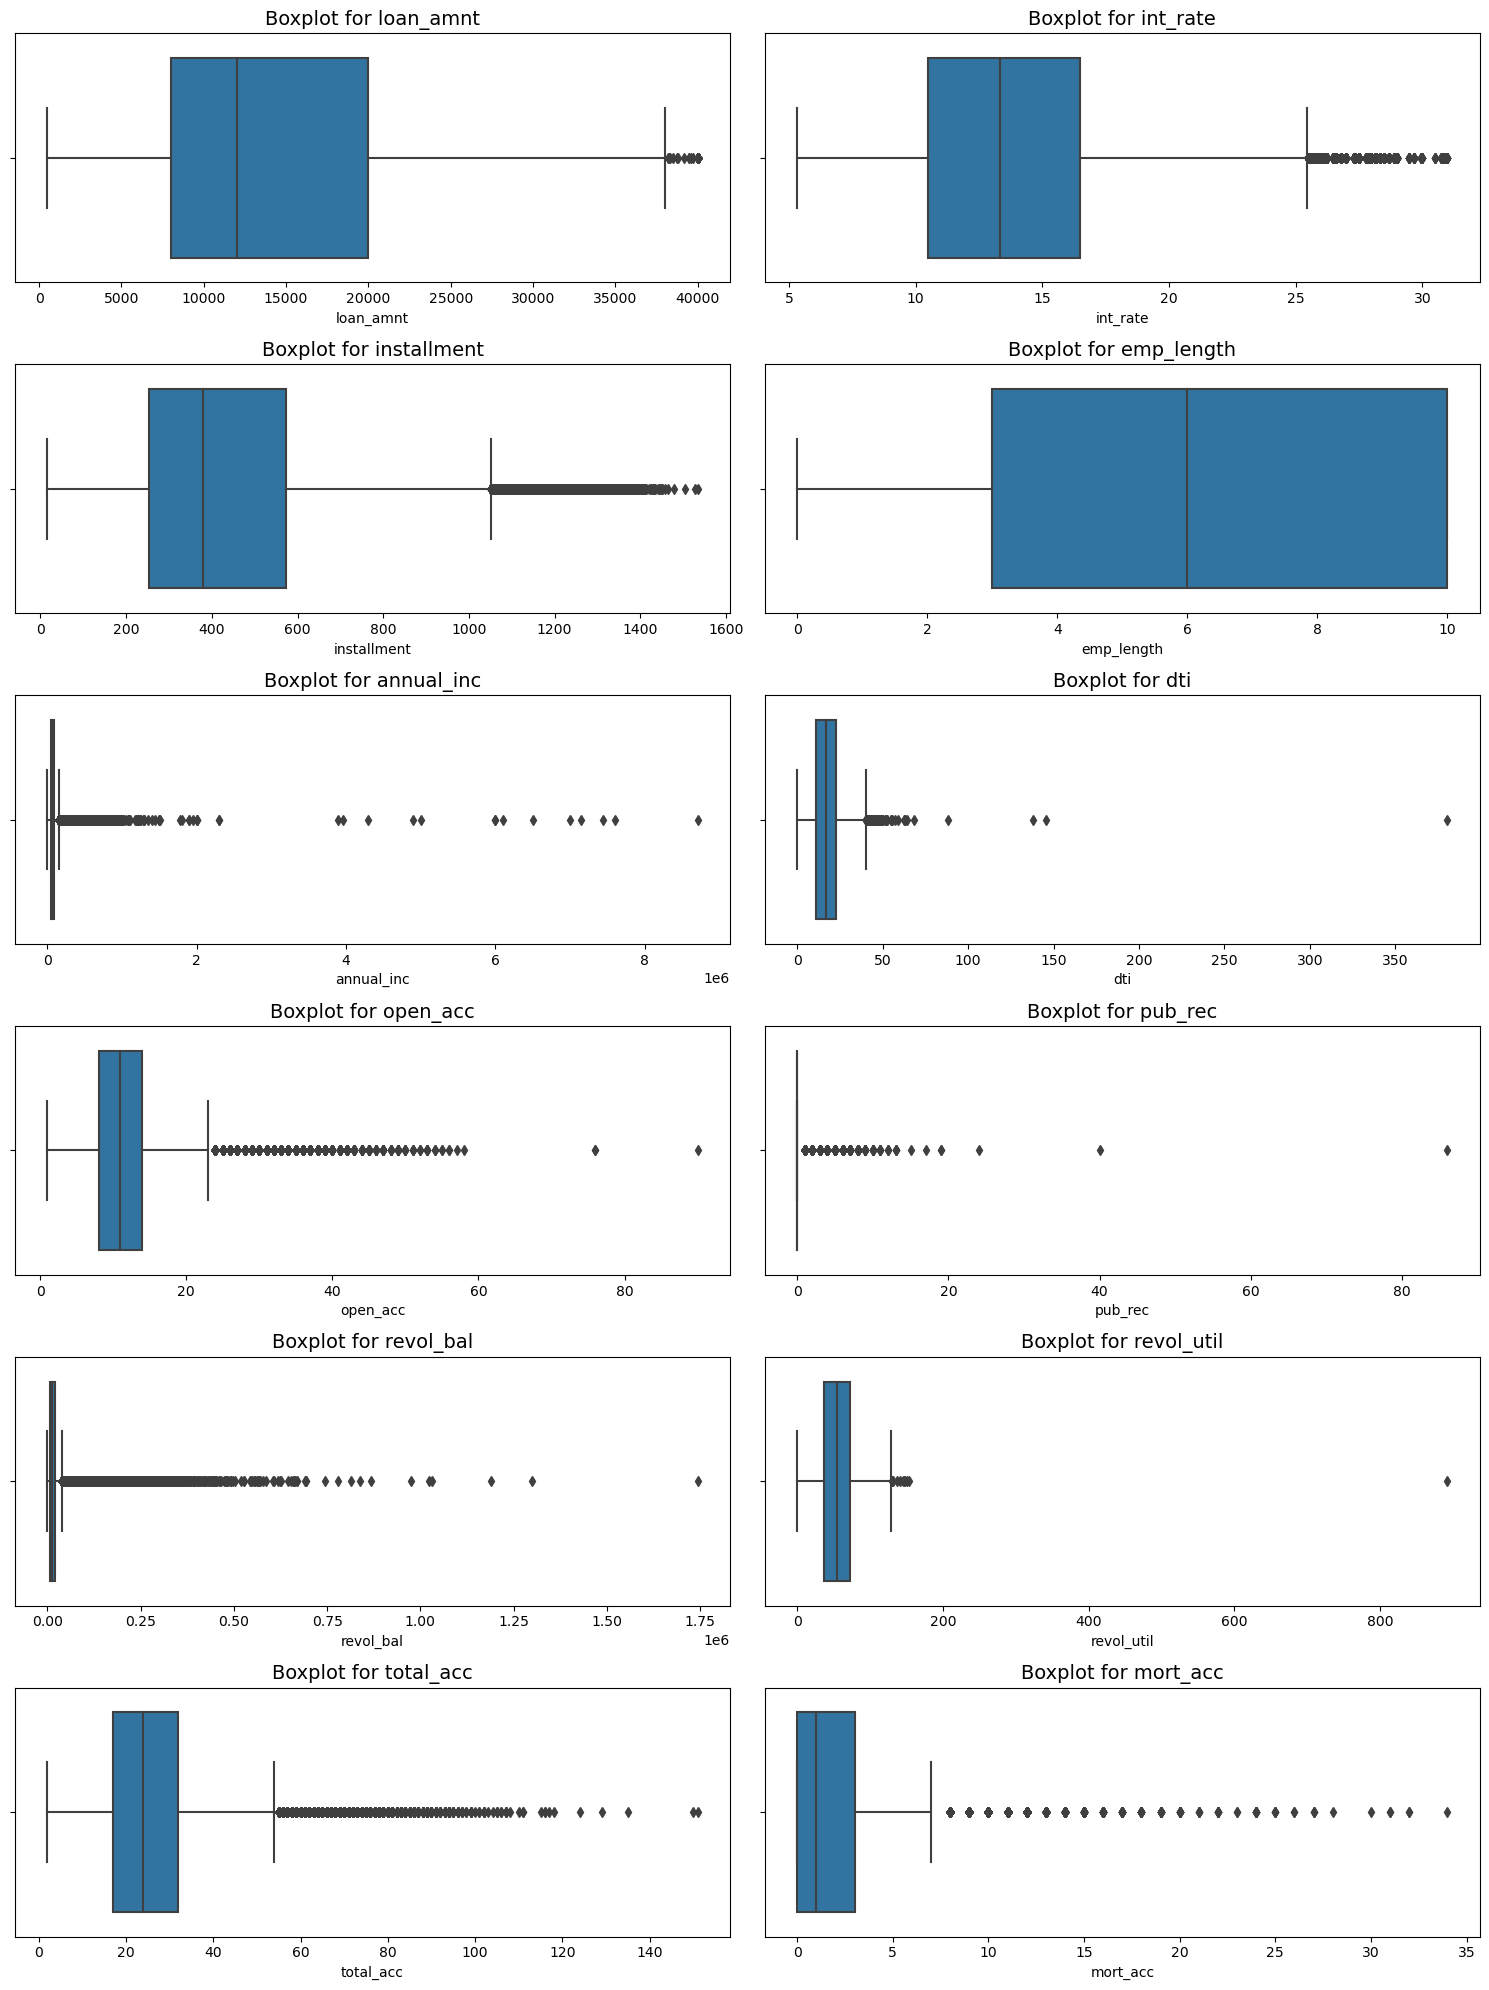

In [24]:
fig, axs = plt.subplots(6, 2, figsize=(15, 20))

for ax, col in zip(axs.flat, num_cols):
    sns.boxplot(data=df, x=col, ax=ax)
    ax.set_title(f'Boxplot for {col}', fontsize=14)

plt.tight_layout()
plt.show()

In [25]:
# Convert pub_rec and pub_rec_bankruptcies to categorical variables

df['pub_rec_bankruptcies'] = np.where(df['pub_rec_bankruptcies']>0,'yes','no')
df['pub_rec'] = np.where(df['pub_rec']>0,'yes','no')
df[['pub_rec_bankruptcies','pub_rec']] = df[['pub_rec_bankruptcies','pub_rec']].astype('category')

In [26]:
# Numeric columns after converting public records to category
num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc'],
      dtype='object')

In [27]:
#Removing outliers using standard deviation
for col in num_cols:
  mean=df[col].mean()
  std=df[col].std()
  upper = mean + (3*std)
  df = df[~(df[col]>upper)]

In [28]:
df.shape

(350845, 27)

## **Feature Engineering**

Extracting Zipcode from Address

In [29]:
def extract_zip(df, column):
    df['zipcode'] = df[column].str.extract(r'(\d{5})$')

    return df

df = extract_zip(df, 'address')
print(df)


        loan_amnt        term  int_rate  installment grade sub_grade  \
0         10000.0   36 months     11.44       329.48     B        B4   
1          8000.0   36 months     11.99       265.68     B        B5   
2         15600.0   36 months     10.49       506.97     B        B3   
3          7200.0   36 months      6.49       220.65     A        A2   
4         24375.0   60 months     17.27       609.33     C        C5   
...           ...         ...       ...          ...   ...       ...   
396025    10000.0   60 months     10.99       217.38     B        B4   
396026    21000.0   36 months     12.29       700.42     C        C1   
396027     5000.0   36 months      9.99       161.32     B        B1   
396028    21000.0   60 months     15.31       503.02     C        C2   
396029     2000.0   36 months     13.61        67.98     C        C2   

                       emp_title  emp_length home_ownership  annual_inc  \
0                      Marketing        10.0           RENT 

In [30]:
df.zipcode.value_counts()

zipcode
70466    50393
30723    50143
22690    50059
48052    49648
00813    40631
29597    40459
05113    40354
11650     9778
93700     9745
86630     9635
Name: count, dtype: int64

Converting "zipcode" to categorical column

In [31]:
df['zipcode'] = df['zipcode'].astype('category')

## **Exploratory Data Analysis**

Correlation Matrix for numerical variables

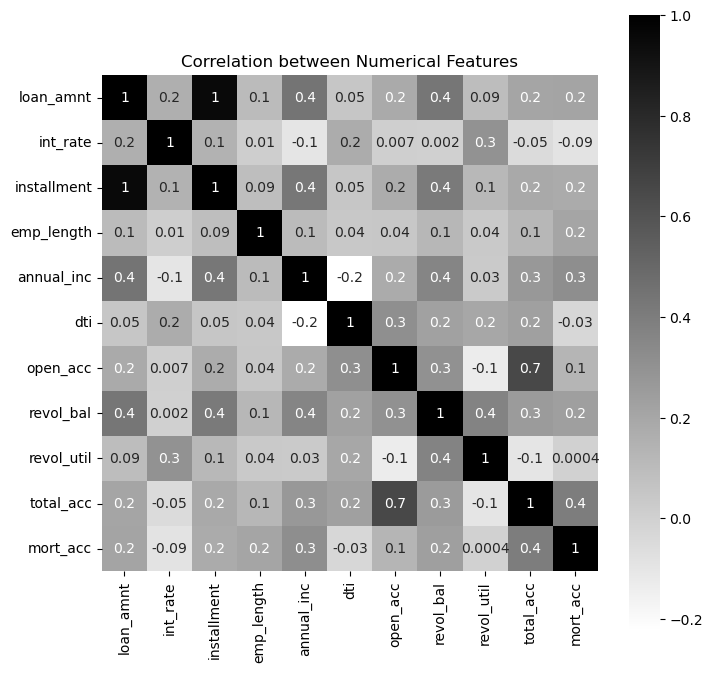

In [32]:
plt.figure(figsize=(8,8))
df_corr = df[num_cols].corr()
sns.heatmap(data = df_corr, annot=True, square=True, fmt=".1g", cmap='gray_r')
plt.title("Correlation between Numerical Features")
plt.show()

Observations:
- `installment` and `loan_amt` are perfectly correlated

- `annual_inc` and `loan_amt` are highly correlated

- `annual_inc` and `installment` are highly correlated

- `open_acc` and `dti` are moderately correlated

- `open_acc` and `total_acc` are very highly correlated

- `revol_bal` is highly correlated with `loan_amt`, `installment` and `annual_inc` and moderately correlated with `open_acc`

- `mort_acc` is highly correlated with `total_acc`

As `installament` has "perfect" correlation with `loan_amt`, we drop `installment` to decrease **multicollinearity**

In [33]:
df.drop(columns=['installment'], inplace=True)

In [34]:
cat_cols

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'initial_list_status',
 'application_type']

Countplots for all the categorical variables

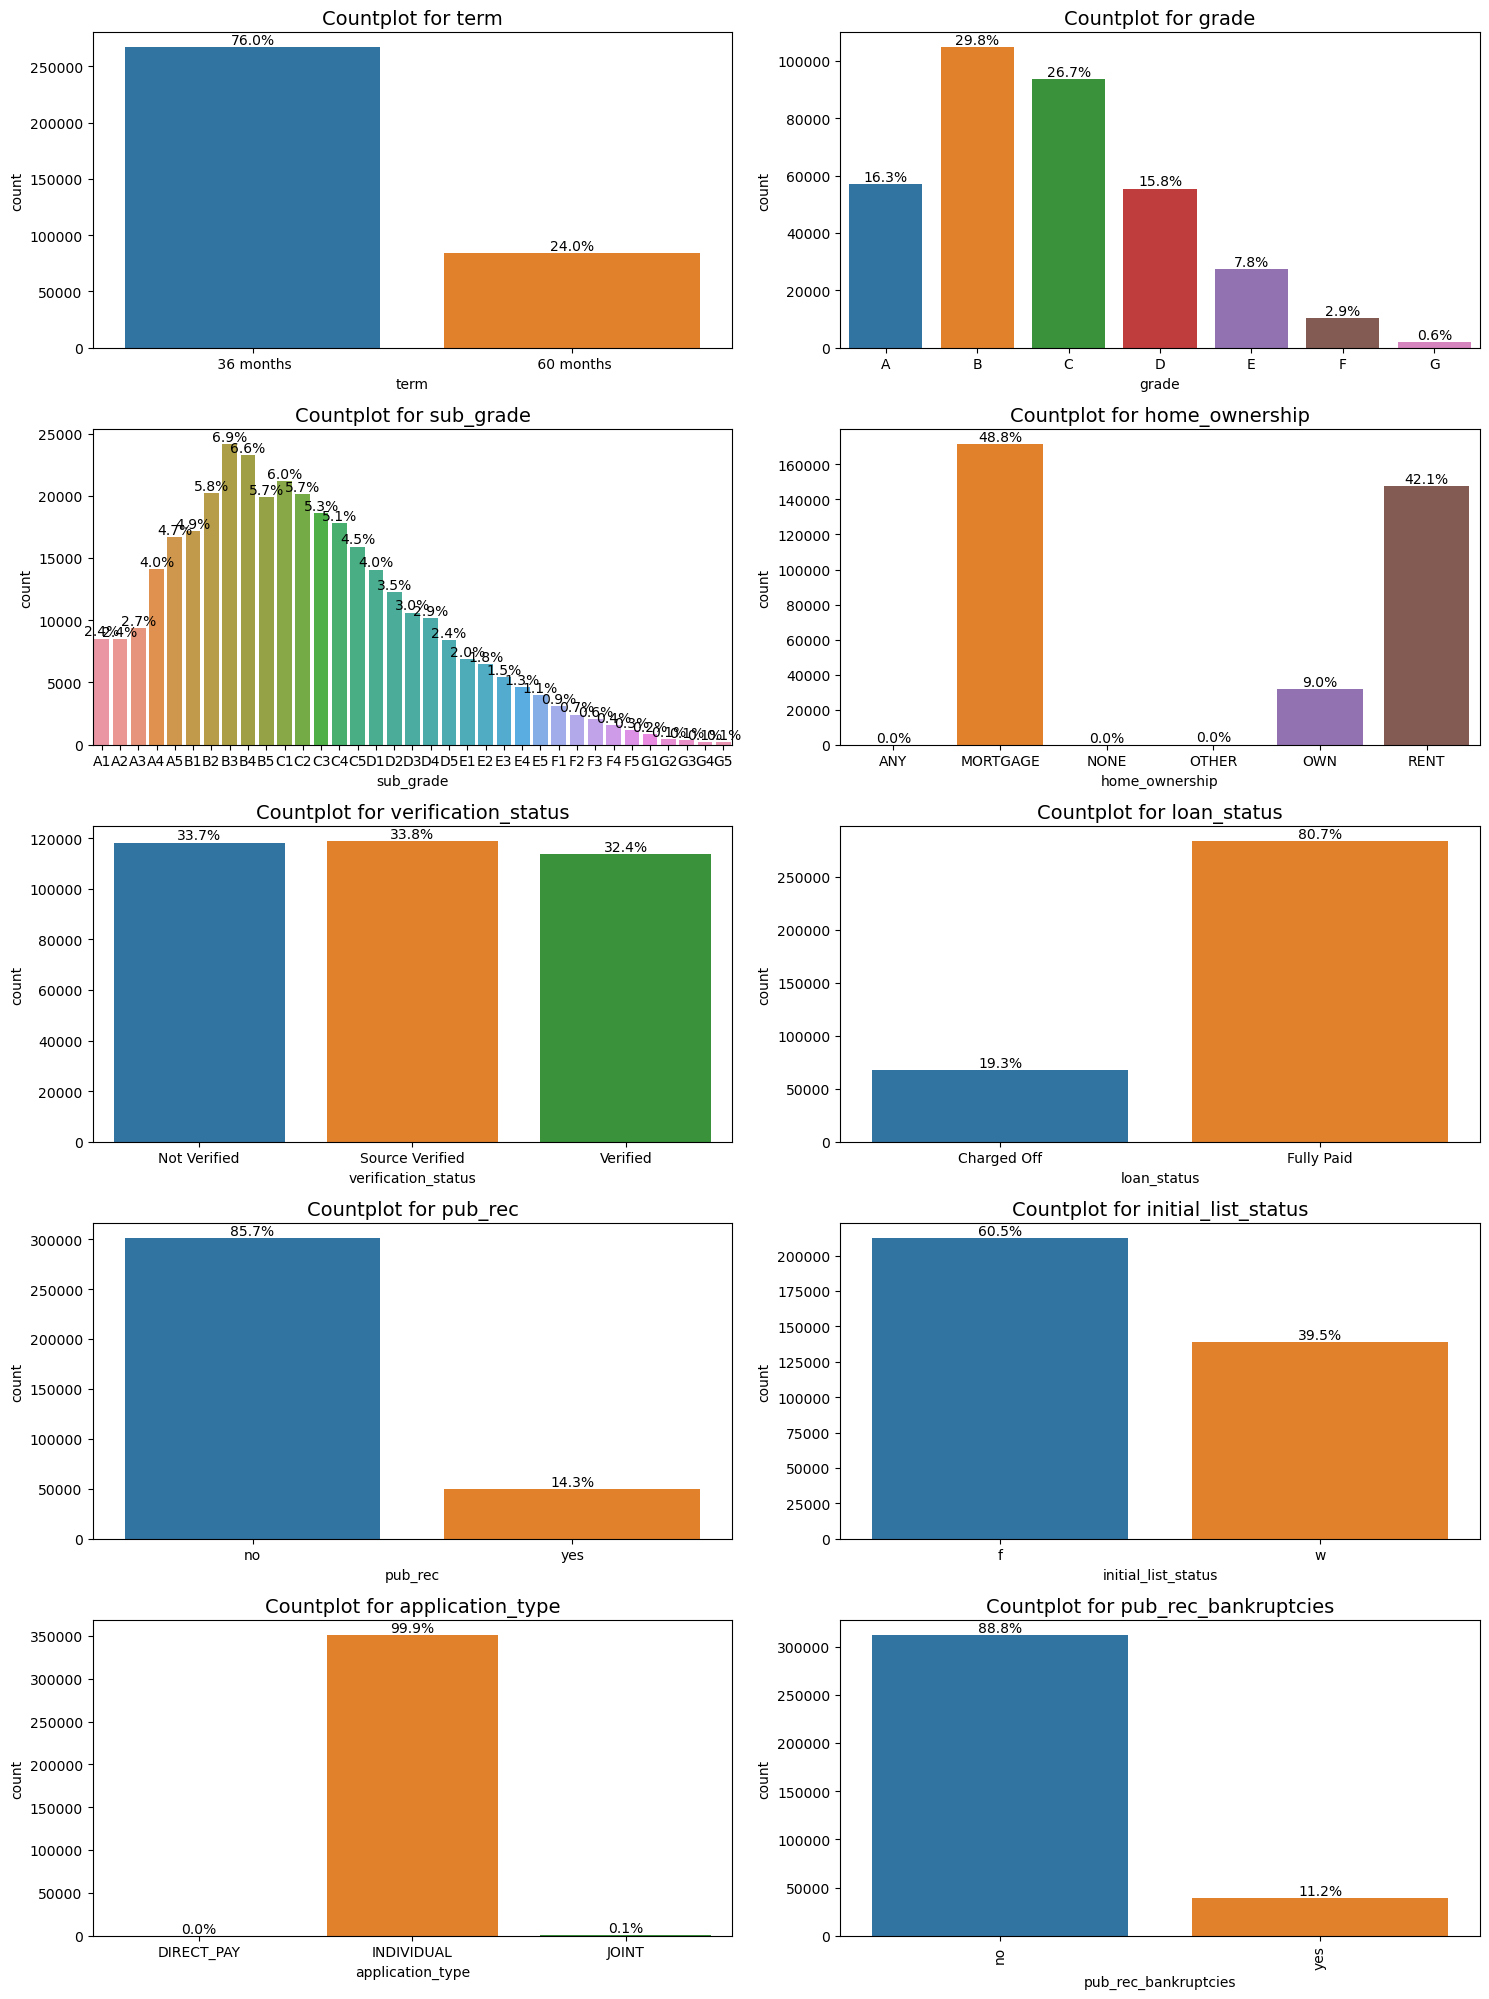

In [35]:
graphs = ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'loan_status', 'pub_rec', 'initial_list_status',
       'application_type', 'pub_rec_bankruptcies']

fig, axs = plt.subplots(5, 2, figsize=(15, 20))

for ax, col in zip(axs.flat, graphs):
    sns.countplot(data=df, x=col, ax=ax)
    ax.set_title(f'Countplot for {col}', fontsize=14)
    
    total = len(df[col])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.tight_layout()
plt.xticks(rotation=90)  
plt.show()

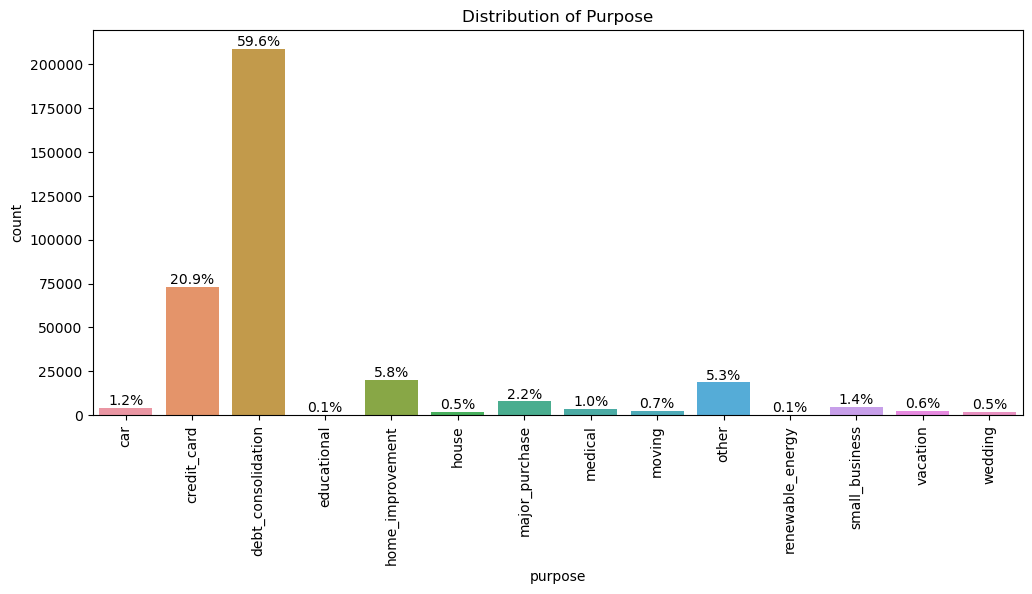

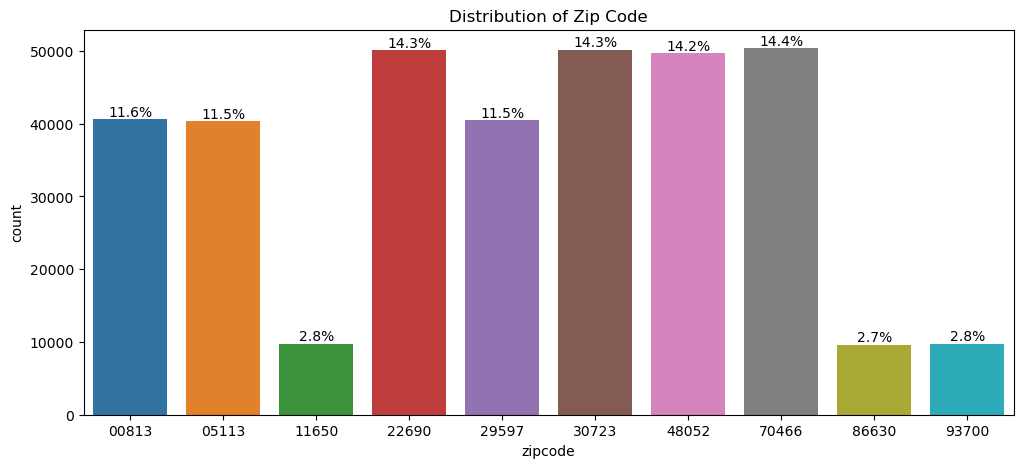

In [36]:
def add_percentages(ax, df, column):
    total = len(df[column])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.figure(figsize=(12,5))
ax1 = sns.countplot(x=df['purpose'])
add_percentages(ax1, df, 'purpose')
plt.xticks(rotation=90)
plt.title('Distribution of Purpose')

plt.figure(figsize=(12,5))
ax2 = sns.countplot(x=df['zipcode'])
add_percentages(ax2, df, 'zipcode')
plt.title('Distribution of Zip Code')

plt.show()


Observations:
- Majority (80.7%) of the people who took credit have Fully Paid.

- Majority (76%) of the people opted for a term of 36 months.

- Top 3 grades for credit include Grade B, C, D.

- The home ownership status for (48.8 %) cases is mortgage followed by Rent (42.1%).

- A vast majority, 85.7%, of the applicants either have no public record or have not declared bankruptcy.

- Nearly all, 99.9%, of the applicants have submitted their applications as 'individuals'.

- More than half, 59.6%, of the loans are utilized for debt consolidation, with the next significant usage, 20.9%, being for credit cards.

Impact of categorical factors on loan status


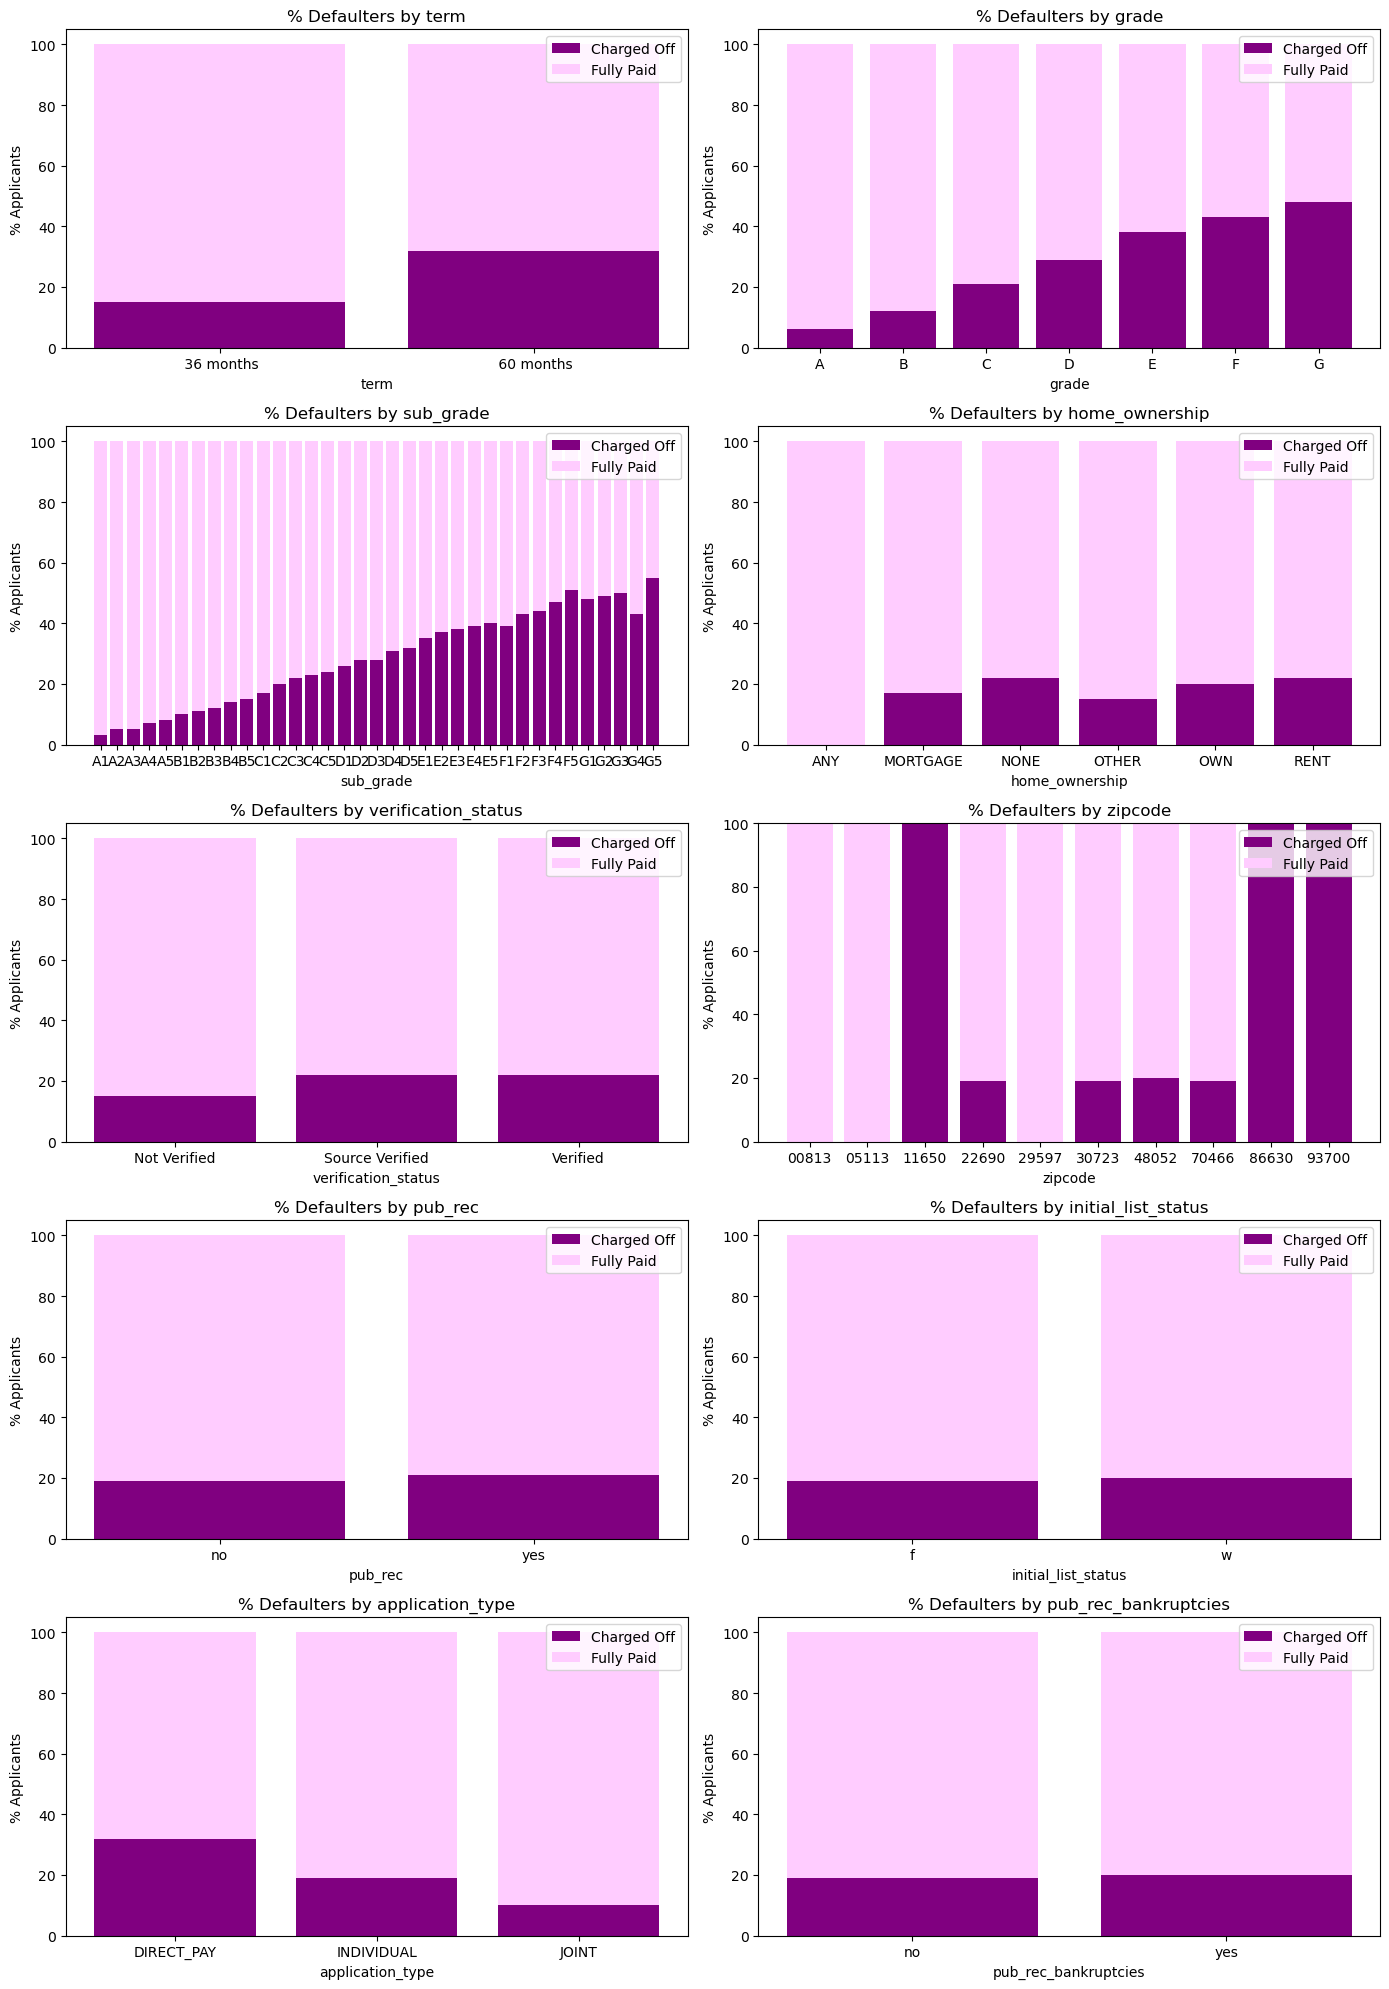

In [37]:
graphs1 = ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'zipcode', 'pub_rec', 'initial_list_status',
       'application_type', 'pub_rec_bankruptcies']

plt.figure(figsize=(14,20))
i=1
for col in graphs1:
  ax=plt.subplot(5,2,i)

  data = df.pivot_table(index=col, columns='loan_status', aggfunc='count', values='purpose')
  data = data.div(data.sum(axis=1), axis=0).multiply(100).round()
  data.reset_index(inplace=True)

  plt.bar(data[col],data['Charged Off'], color='#800080')
  plt.bar(data[col],data['Fully Paid'], color='#ffccff', bottom=data['Charged Off'])
  plt.xlabel(f'{col}')
  plt.ylabel('% Applicants')
  plt.title(f'% Defaulters by {col}')
  plt.legend(['Charged Off','Fully Paid'])
  i += 1


plt.tight_layout()
plt.show()

Impact of Purpose/state on loan status

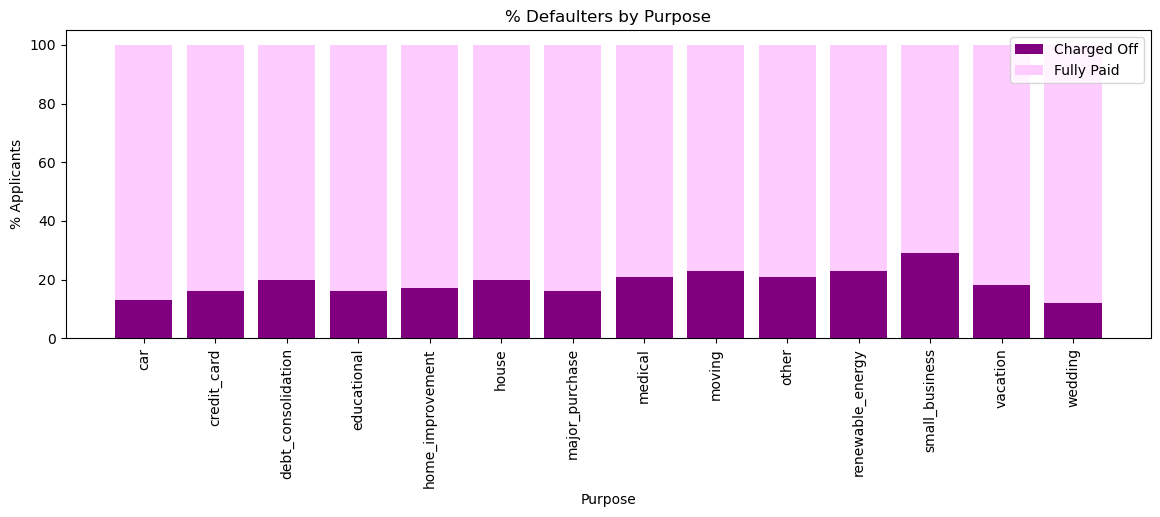

In [38]:
purpose = df.pivot_table(index='purpose', columns='loan_status', aggfunc='count', values='sub_grade')
purpose = purpose.div(purpose.sum(axis=1), axis=0).multiply(100).round()
purpose.reset_index(inplace=True)

plt.figure(figsize=(14,4))
plt.bar(purpose['purpose'],purpose['Charged Off'], color='#800080')
plt.bar(purpose['purpose'],purpose['Fully Paid'], color='#ffccff', bottom=purpose['Charged Off'])
plt.xlabel('Purpose')
plt.ylabel('% Applicants')
plt.title('% Defaulters by Purpose')
plt.legend(['Charged Off','Fully Paid'])
plt.xticks(rotation=90)
plt.show()

Observations:

* A larger percentage of defaulters are observed for terms extending to 60 months.

* As anticipated, the grade/sub-grade appears to have the most significant influence on loan status, with the highest grade seeing the most defaults.

* Certain zip codes, specifically 11650, 86630, and 93700, show a 100% default rate.

* The initial_list_status and state variables can be disregarded as they don't seem to affect the loan status.

* Interestingly, public records do not appear to have any noticeable impact on loan status.

* The default rate is higher for the direct pay application type compared to individual or joint types.

* Loans procured for the purpose of small businesses show the highest default rate.

Impact of numerical features on loan_status

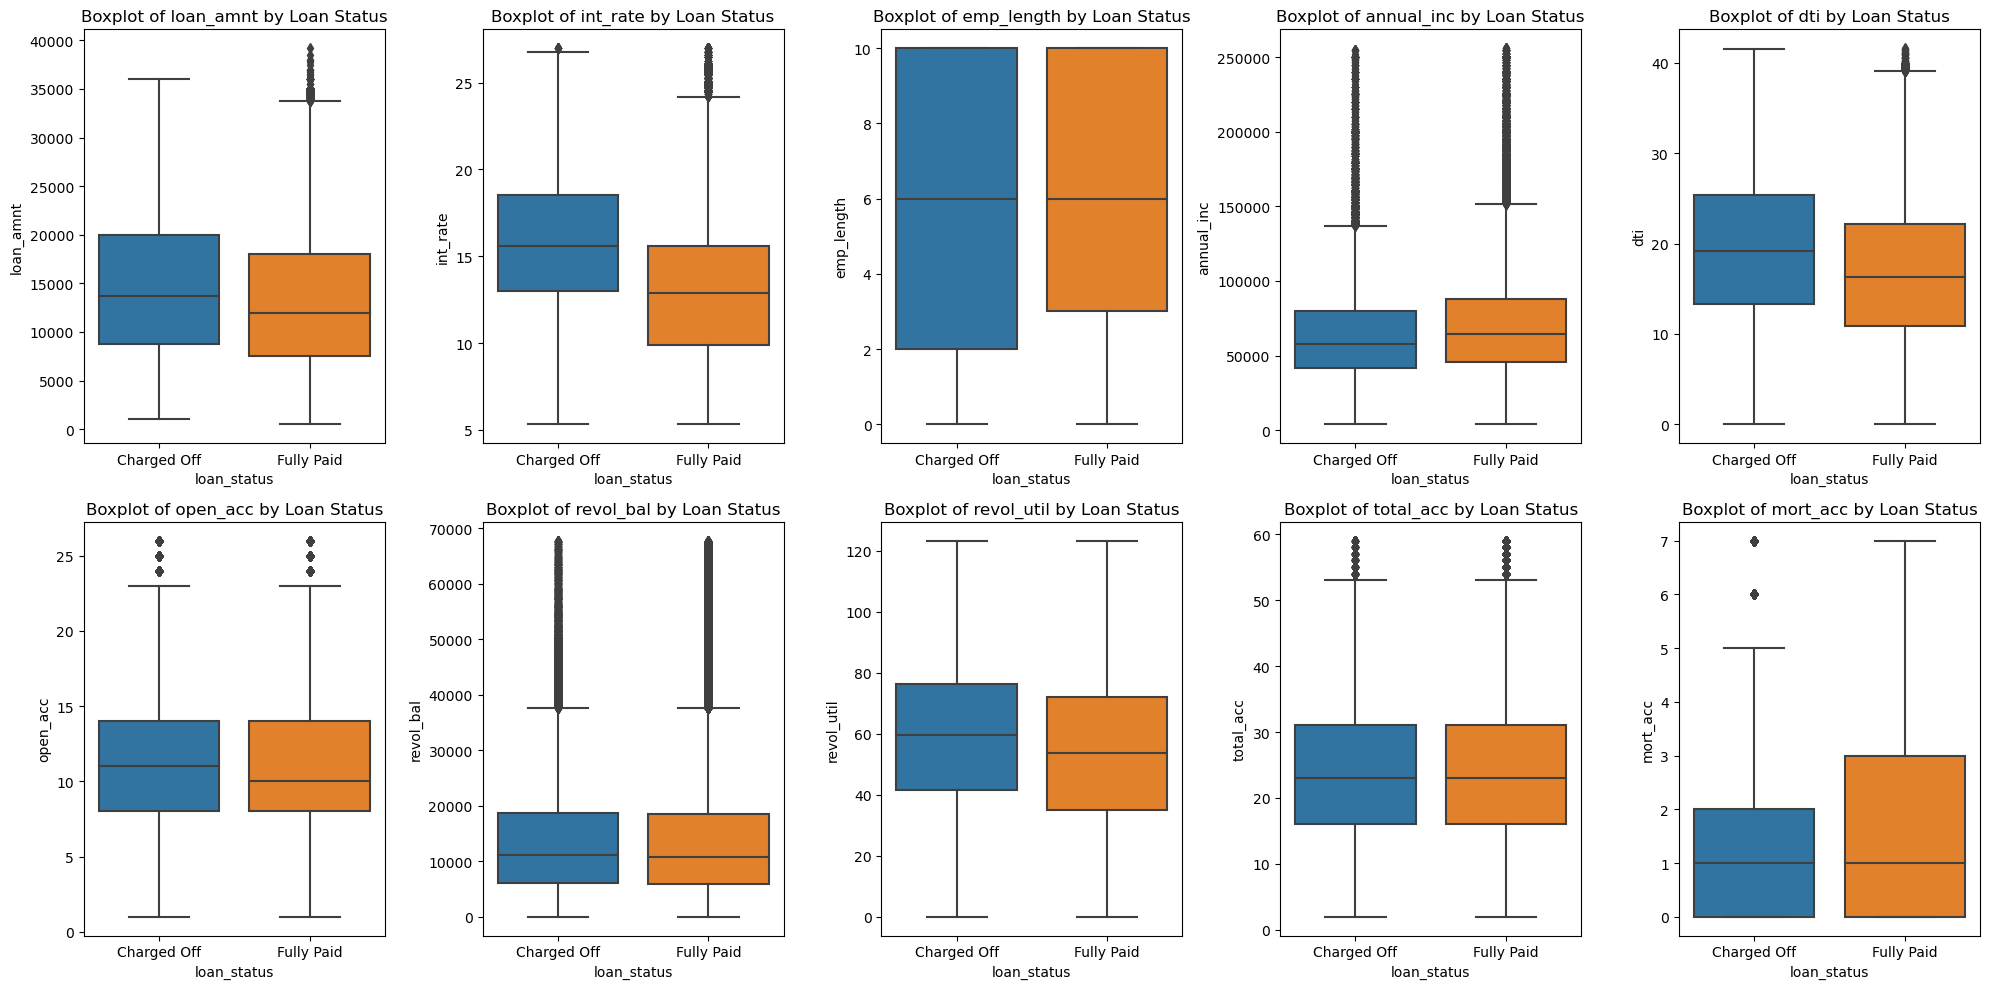

In [39]:
fig, axs = plt.subplots(2, 5, figsize=(20, 10))

graphs2 = ['loan_amnt', 'int_rate', 'emp_length', 'annual_inc',
       'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc']

for ax, col in zip(axs.flat, graphs2):
    sns.boxplot(data=df, y=col, x='loan_status', ax=ax)
    ax.set_title(f'Boxplot of {col} by Loan Status', fontsize=12)

plt.tight_layout()
plt.show()

Observations:
* The boxplots indicate that the average loan amount, interest rate, debt-to-income ratio, number of open credit lines, and revolving line utilization rate tend to be marginally higher for those who default. Conversely, the annual income appears to be lower for defaulters.

 Remove columns which do not have an impact on loan_status

In [40]:
df.drop(columns=['initial_list_status',
                 'emp_title', 'title','earliest_cr_line',
                 'issue_d','sub_grade', 'address'], inplace=True)

## **Data Preparation**

In [41]:
df['loan_status']  = df['loan_status'].map({'Fully Paid': 0, 'Charged Off':1}).astype(int)

In [42]:
x = df.drop(columns=['loan_status'])
x.reset_index(inplace=True, drop=True)
y = df['loan_status']
y.reset_index(drop=True, inplace=True)

Encoding Binary features into numerical dtype

In [43]:
x['term']=x['term'].map({' 36 months': 36, ' 60 months':60}).astype(int)
x['pub_rec']=x['pub_rec'].map({'no': 0, 'yes':1}).astype(int)
x['pub_rec_bankruptcies']=x['pub_rec_bankruptcies'].map({'no': 0, 'yes':1}).astype(int)

One-Hot Encoding of categorical features

In [44]:
cat_cols = x.select_dtypes('category').columns

encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(x[cat_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cat_cols))
x = pd.concat([x,encoded_df], axis=1)
x.drop(columns=cat_cols, inplace=True)
x.head()

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT,zipcode_00813,zipcode_05113,zipcode_11650,zipcode_22690,zipcode_29597,zipcode_30723,zipcode_48052,zipcode_70466,zipcode_86630,zipcode_93700
0,10000.0,36,11.44,10.0,117000.0,26.24,16.0,0,36369.0,41.8,25.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8000.0,36,11.99,4.0,65000.0,22.05,17.0,0,20131.0,53.3,27.0,3.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15600.0,36,10.49,0.0,43057.0,12.79,13.0,0,11987.0,92.2,26.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7200.0,36,6.49,6.0,54000.0,2.60,6.0,0,5472.0,21.5,13.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24375.0,60,17.27,9.0,55000.0,33.95,13.0,0,24584.0,69.8,43.0,1.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Train-Test Split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,stratify=y,random_state=42)

In [46]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((280676, 56), (280676,), (70169, 56), (70169,))

Scaling 

In [47]:
scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

In [48]:
x_train.head()

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT,zipcode_00813,zipcode_05113,zipcode_11650,zipcode_22690,zipcode_29597,zipcode_30723,zipcode_48052,zipcode_70466,zipcode_86630,zipcode_93700
0,0.529716,0.0,0.313798,1.0,0.543651,0.318980,0.48,0.0,0.598311,0.478508,0.421053,0.714286,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.762274,1.0,0.377019,0.4,0.281746,0.549675,0.40,0.0,0.068877,0.212490,0.771930,0.428571,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.082687,1.0,0.513613,0.2,0.182546,0.522733,0.28,0.0,0.259004,0.647202,0.473684,0.285714,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.245478,1.0,0.578680,0.2,0.194444,0.646139,0.80,1.0,0.003218,0.018654,0.842105,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.297158,0.0,0.400092,1.0,0.468254,0.101997,0.36,0.0,0.140219,0.278994,0.298246,0.142857,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Balancing the data with SMOTE

In [49]:
sm=SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train,y_train.ravel())

print(f"Before OverSampling, count of label 1: {sum(y_train == 1)}")
print(f"Before OverSampling, count of label 0: {sum(y_train == 0)}")
print(f"After OverSampling, count of label 1: {sum(y_train_res == 1)}")
print(f"After OverSampling, count of label 0: {sum(y_train_res == 0)}")

Before OverSampling, count of label 1: 54200
Before OverSampling, count of label 0: 226476
After OverSampling, count of label 1: 226476
After OverSampling, count of label 0: 226476


## **Logistic Regression Model**

In [50]:
model = LogisticRegression()
model.fit(x_train_res, y_train_res)
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

Performance evaluation

In [51]:
print('Train Accuracy :', model.score(x_train, y_train).round(2))
print('Train F1 Score:',f1_score(y_train,train_pred).round(2))
print('Train Recall Score:',recall_score(y_train,train_pred).round(2))
print('Train Precision Score:',precision_score(y_train,train_pred).round(2))

print('\nTest Accuracy :',model.score(x_test,y_test).round(2))
print('Test F1 Score:',f1_score(y_test,test_pred).round(2))
print('Test Recall Score:',recall_score(y_test,test_pred).round(2))
print('Test Precision Score:',precision_score(y_test,test_pred).round(2))


Train Accuracy : 0.8
Train F1 Score: 0.61
Train Recall Score: 0.81
Train Precision Score: 0.49

Test Accuracy : 0.8
Test F1 Score: 0.61
Test Recall Score: 0.81
Test Precision Score: 0.49


Confusion Matrix

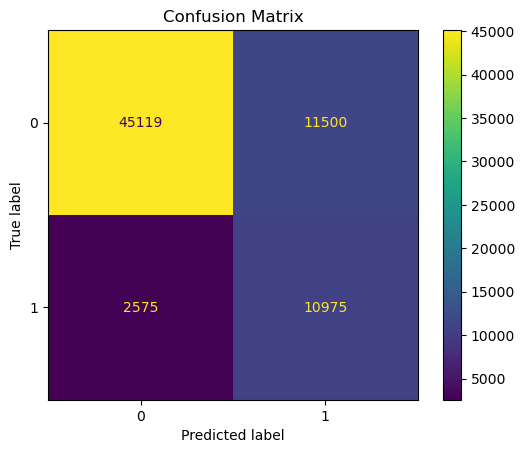

In [52]:
cm = confusion_matrix(y_test, test_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [53]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87     56619
           1       0.49      0.81      0.61     13550

    accuracy                           0.80     70169
   macro avg       0.72      0.80      0.74     70169
weighted avg       0.86      0.80      0.82     70169



Observations:

- The model demonstrates a high recall score, successfully identifying 80% of actual defaulters. However, the precision for the positive class is low, with only 50% of predicted defaulters truly defaulting.

- While this model is efficient in decreasing Non-Performing Assets (NPAs) by identifying a majority of defaulters, it could potentially lead to the denial of loans to numerous eligible customers due to its low precision, resulting in false positives.

- The low precision has also contributed to a decrease in the F1 score to 60%, despite an accuracy rate of 80%.

In [54]:
model.coef_ , model.intercept_

(array([[ 0.6719389 ,  0.46253194,  0.52216118, -0.01734657, -1.6344769 ,
          1.06953752,  0.84947767,  0.05742145, -0.57950408,  0.6083982 ,
         -0.76639648, -0.30368084, -0.05526766, -0.97460695, -0.50802427,
         -0.11409964,  0.09645053,  0.23356984,  0.27858868,  0.32463128,
         -0.02816698, -0.20153556,  0.063651  , -0.3132311 , -0.15254883,
         -0.03165906, -0.29937081, -0.09933206, -0.26478766, -0.43979944,
          0.01932099,  0.10036699,  0.21019439,  0.16430027, -0.19824348,
         -0.02881873, -0.01429373, -0.02071557,  0.11323803, -0.01268193,
          0.50485442, -0.26085149, -0.80036127, -0.35040229,  0.663504  ,
         -0.97659224, -8.54253537, -8.53194705,  8.71574978, -0.28496384,
         -8.52470856, -0.29036536, -0.25087859, -0.28602284,  8.5927264 ,
          8.73945489]]),
 array([-0.69669174]))

Feature Importance

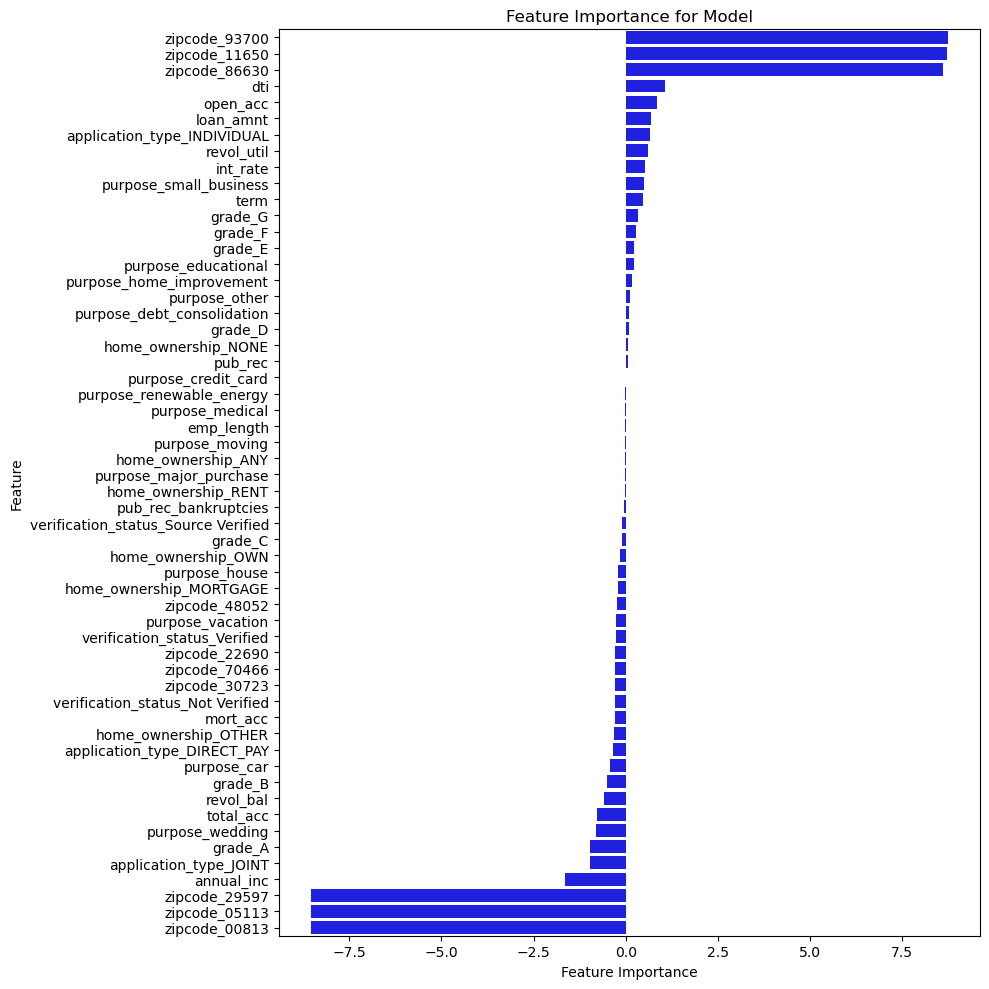

In [55]:
feature_imp = pd.DataFrame({'Columns':x_train.columns, 'Coefficients':model.coef_[0]}).sort_values('Coefficients', ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x = feature_imp['Coefficients'], y = feature_imp['Columns'], color='blue')
plt.title("Feature Importance for Model")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

Observations:
* The model has allocated significant importance to features such as zip_code, followed by dti, open_acc, and loan_amnt.

* A few zip codes, along with annual income and joint application type, have been assigned substantial negative coefficients.

## **ROC Curve & AUC**

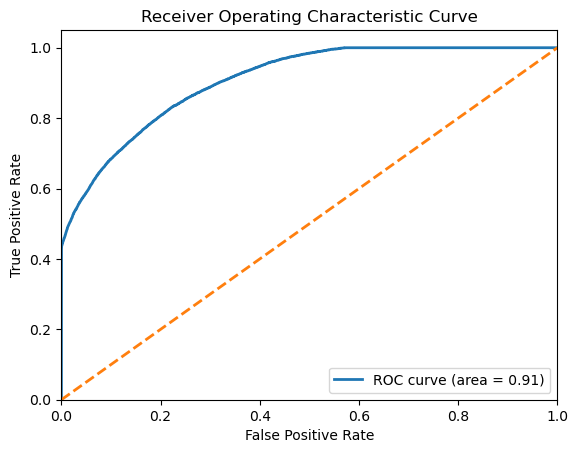

In [56]:
probs = model.predict_proba(x_test)[:,1]

fpr, tpr , th = roc_curve(y_test,probs)

roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr,  lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],  lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()


Observations:
* An AUC of 0.91 indicates that the model is proficient at distinguishing between positive and negative classes.

* However, it's not an ideal metric for datasets with an imbalanced target variable, as it can still be high even if the classifier performs poorly on the minority class.

* This situation can arise when the classifier excels at identifying instances of the majority class, which are predominant in the dataset. Consequently, while the AUC might seem high, the model might not be effective at detecting instances of the minority class.

## **Precision-Recall Curve**

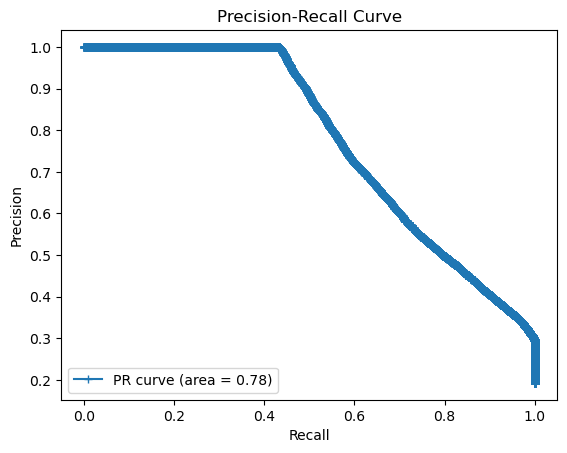

In [57]:
precision, recall, thresholds = precision_recall_curve(y_test, probs)

auprc = average_precision_score(y_test, probs)

plt.plot(recall, precision, marker='+', label='PR curve (area = %0.2f)' % auprc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

Observations:

- A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. In this case it is not much high but does a good job.

## **Tradeoff Questions**

1. How can we make sure that our model can detect real defaulters and there
are less false positives? This is important as we can lose out on an
opportunity to finance more individuals and earn interest on it.

    **ans.** High Precision reduces the flase positive rate and hence increasing precision makes sure the company doesn't lose out on opportunities




2. Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone


    **ans.** The recall score serves as a measure of the model's ability to correctly identify actual defaulters. By enhancing the recall score, we can reduce the occurrence of false negatives, thereby ensuring that loans are not granted to individuals who are likely to default.

## **Insights**:

* Longer loan terms (60 months) and lower grades see significantly higher default rates.

* Specific zip codes, like 11650, 86630, and 93700, have strikingly high (100%) default rates.

* Grade/sub-grade has the strongest impact on loan status, with highest grades surprisingly yielding highest defaults.

* Features like "initial_list_status" and "state" can be excluded due to minimal influence on loan status.

* "Direct pay" application type carries a higher default risk compared to individual/joint, and small business loans have the highest default rate overall.

* Higher loan amounts, interest rates, DTIs, open accounts, and revolving utilization are associated with defaults, while annual income is lower for defaulters.

## **Model Performance**:

* The Logistic Regression model achieved impressive accuracy (80%).

* The model excels at identifying non-defaulters (high precision, recall, and F1).

* Performance on identifying defaulters is good but can be improved (moderate precision, high recall, and F1).

* The ROC curve confirms good overall class differentiation (AUC = 0.91).

* Area under Precision-Recall curve (AUC-PR) shows potential for improvement (0.78).

## **Recommendations**:

* Maximize F1 score and AUC-PR to balance risk and reward in loan portfolio. This optimizes both identifying defaulters and approving loans for worthy customers.

* Explore more complex models like Random Forests for potentially better performance. These models can handle non-linear relationships that Logistic Regression may miss.

* Investigate specific factors behind high default rates in certain zip codes.

* Analyze features within "Direct pay" application type and "Small business" loan purpose to understand their impact.

 

## **Questionnaire**

1. What percentage of customers have fully paid their Loan Amount? --> **80.7 %**

2. Comment about the correlation between Loan Amount and Installment features.

    - `installment"` and `loan_amt` are **perfectly** correlated
    - It suggests that for every unit increase or decrease in loan_amt, there is a corresponding increase or decrease in installment. This implies that the installment amount is directly proportional to the loan amount.

3. The majority of people have home ownership as --> **Mortgage (48.8 %)**

4. People with grades ‘A’ are more likely to fully pay their loan. --> **TRUE**

5. Name the top 2 afforded job titles. --> **Teacher** & **Manager**

6. Thinking from a bank's perspective, which metric should our primary focus be on..

    - F1 Score might be ideal, as it balances both precision (avoiding defaulters) and recall (identifying good borrowers).

    - ROC AUC is valuable for overall classification performance, but it doesn't directly address class imbalance.
    
    - Precision is crucial for minimizing loan defaults, but it might lead to rejecting too many good borrowers (lower recall).
    
    - Recall prioritizes approving good borrowers, but it can increase the risk of defaulters.

7. How does the gap in precision and recall affect the bank? 
    
    A large gap between precision and recall signifies an imbalance in the model's performance. In this case, the model excels at identifying non-defaulters (high precision) but misses more defaulters (lower recall). This leads to:

    - False positives: Approving some bad borrowers who might default (financial loss).
        
    - False negatives: Rejecting some good borrowers who would have repaid the loan (lost profit).

8. Which were the features that heavily affected the outcome?
    - The features such as `zip_code`, `application_type`, `grade` followed by `dti`, `open_acc`, `interest rate` and `loan_amnt` have high affect on the outome

9. Will the results be affected by geographical location? (Yes/No)  --> **Yes**, because from the feature significance barplot, it is evident that some of the zipcodes have high significance in determining the outcome.

---